In [1]:
import os
os.chdir('..')

In [7]:
import numpy as np

In [6]:
from src.common.utils import generate_population
from src.common.scales import scales
from src.common.fitness import schwefel

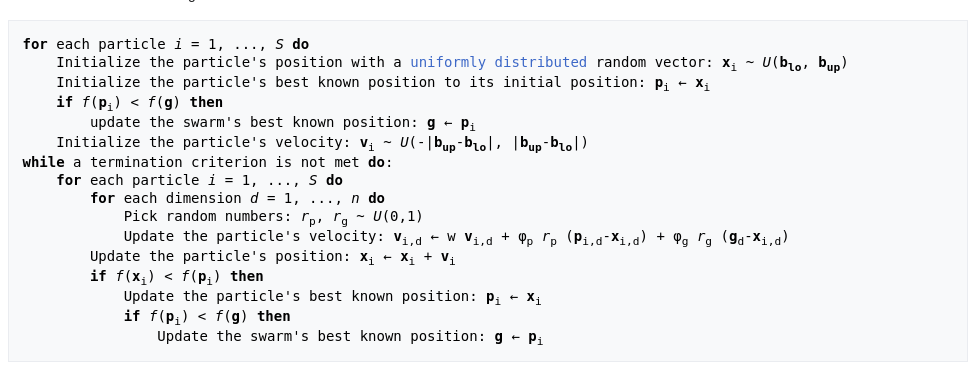

In [58]:
phi_p = .5
phi_g = .3
w = .2
N_genomes = 200
N_dimensions = 5
N_epochs = 100
seed = 1
fitness_fn = schwefel

In [59]:
%%time
np.random.seed(seed)
low, high = -scales['schwefel'][0], scales['schwefel'][0]
population = generate_population(seed, low, high, N_genomes, N_dimensions)
best_known = population.copy()
fitness = np.apply_along_axis(fitness_fn, 1, population)
swarm_best_known = best_known[np.argmin(fitness)]
velocities = generate_population(seed, -np.abs(high - low), np.abs(high - low), N_genomes, N_dimensions)

for i in range(N_epochs):
    for particle_index in range(N_genomes):
        r_p, r_g = np.random.rand(N_dimensions), np.random.rand(N_dimensions)
        velocities[particle_index] = w * velocities[particle_index] \
        + phi_p * r_p * (best_known[particle_index] - population[particle_index]) \
        + phi_g * r_g * (swarm_best_known - population[particle_index])
        population[particle_index] = np.clip(population[particle_index] + velocities[particle_index], low, high)
        if fitness_fn(population[particle_index]) < fitness_fn(best_known[particle_index]):
            best_known[particle_index] = population[particle_index]

            if fitness_fn(best_known[particle_index]) < fitness_fn(swarm_best_known):
                swarm_best_known = best_known[particle_index]
    if i % 20:
        print(f'Best fitness: {fitness_fn(swarm_best_known)}')

Best fitness: 791.4611568975361
Best fitness: 791.4611568975361
Best fitness: 510.16116050114874
Best fitness: 510.16116050114874
Best fitness: 510.16116050114874
Best fitness: 510.16116050114874
Best fitness: 510.16116050114874
Best fitness: 510.16116050114874
Best fitness: 510.16116050114874
Best fitness: 497.0345556912248
Best fitness: 492.6454267269837
Best fitness: 471.748197473893
Best fitness: 465.1894896699757
Best fitness: 452.08175135337274
Best fitness: 449.94100812064585
Best fitness: 449.5324898161614
Best fitness: 449.4515714810584
Best fitness: 449.4354192277751
Best fitness: 446.5180847024785
Best fitness: 437.17865722849524
Best fitness: 386.38108651669563
Best fitness: 377.22130289421716
Best fitness: 370.33363026020675
Best fitness: 362.6869296290083
Best fitness: 354.8733202256951
Best fitness: 352.4673653722043
Best fitness: 352.00208649724436
Best fitness: 351.43343946580444
Best fitness: 335.19620719878185
Best fitness: 332.49986361605056
Best fitness: 326.011295

In [47]:
(4.2 * 100) / 60

7.0

In [56]:
np.array([2, 0]) * np.array([5, -2])

array([10,  0])